In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
from PIL import Image, ImageFilter, ImageOps

In [6]:
img = cv2.imread("C:/Users/devda/Major/Data/all-mias/JPEG/Tumors/tumor.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

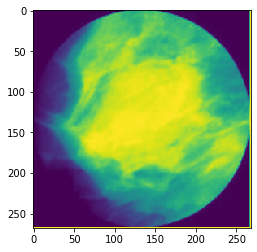

In [7]:
plt.imshow(img)

In [ ]:
a = img.max()
ret, th1 = cv2.threshold(img, (a/2)+100, 255, cv2.THRESH_BINARY)

In [ ]:
plt.imshow(th1)

In [ ]:
contours, hierarchy = cv2.findContours(th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
maxi = cv2.contourArea(contours[0])
idx = 0
for i in range(1, len(contours)):
    if cv2.contourArea(contours[i]) > maxi:
        maxi = cv2.contourArea(contours[i])
        idx = i

In [ ]:
cv2.drawContours(img, contours[idx], -1, (0,255,0), 3)

In [ ]:
plt.imshow(img)

In [ ]:
(x,y), r = cv2.minEnclosingCircle(contours[idx])

In [ ]:
cv2.circle(img, (int(x), int(y)), int(r), (0, 0, 0), 5)

In [ ]:
plt.imshow(img)

In [ ]:
perimeter = cv2.arcLength(contours[idx], True) 

In [ ]:
perimeter

In [ ]:
area = 4*3.14*3.14*r**2

In [ ]:
area

In [ ]:
roundness = (perimeter**2)/(4*3.14*area)

In [ ]:
ltb = cv2.contourArea(contours[idx])/(3.14*r**2)

In [ ]:
roundness

In [ ]:
ltb

In [ ]:
M = cv2.moments(th1)

In [ ]:
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])


In [ ]:
cX, cY

In [ ]:
new_img = np.zeros_like(th1)
for val in np.unique(th1)[1:]:                                      
        mask = np.uint8(th1 == val)                                     
        labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]  
        largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])      
        new_img[labels == largest_label] = val       

In [ ]:
plt.imshow(new_img)

In [ ]:
new_img = cv2.bitwise_and(img, img, mask=new_img)

In [ ]:
plt.imshow(new_img)

In [ ]:
new_new_img = new_img/255

In [ ]:
energy = 0
entropy = 0
inv_moment = 0
contrast_coeff = 0
corr_coeff = 0
m = np.mean(new_new_img)
v = np.var(new_new_img)
for i in range(new_new_img.shape[0]):
    for j in range(new_new_img.shape[1]):
        energy = energy + new_new_img[i, j]**2
        inv_moment = inv_moment + new_new_img[i, j] / (1 + (i-j)**2)
        contrast_coeff = contrast_coeff + ((i-j)**2)*new_new_img[i, j]
        if new_new_img[i, j]!=0:
            entropy = entropy + new_new_img[i, j] * (-np.log(new_new_img[i, j]))
        

In [ ]:
energy, contrast_coeff, inv_moment, m, entropy, v

In [ ]:
i*j, new_new_img.shape[0]*new_new_img.shape[1]

In [7]:
hist = cv2.calcHist([img], [0], None, [256], [0,256])  

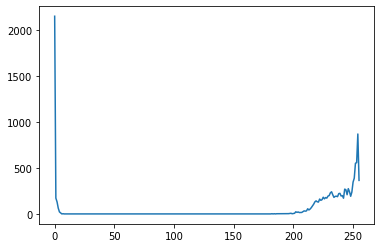

In [8]:
plt.plot(hist) 
plt.show() 

In [ ]:
peak = max(hist)
me = np.mean(hist)
va = np.var(hist)
sk = skew(hist)

In [ ]:
from scipy.stats import kurtosis, skew

In [ ]:
peak, me, va, sk

In [ ]:
sk = sk[0]